In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
max_features = 20000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 128
epochs=50
validation_split=0.2

In [3]:
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=max_features)

In [4]:
data_train = pad_sequences(train_data, maxlen=maxlen)
data_test = pad_sequences(test_data, maxlen=maxlen)

In [5]:
class Model:
    def __init__(self, input_train, y_train, var, epochs, batch_size, validation_split):
        self.var = var

        self.input_train = input_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split

        self.callback_early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1, mode="max")
        self.callback_save = ModelCheckpoint("best_Hw11.keras", monitor="val_loss", save_best_only=True)

        self.model = Sequential()
        self.model.add(Embedding(max_features, 32))
        self.model.add(var)
        self.model.add(Dense(1, activation='sigmoid'))

    def compile(self):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
        return self.model

    def summary(self):
        self.model.summary()
        return self.model

    def fit(self):
        fits = self.model.fit(self.input_train,
                              self.y_train,
                              epochs=self.epochs,
                              batch_size=self.batch_size,
                              validation_split=self.validation_split,
                              callbacks=[self.callback_early_stopping, self.callback_save])
        return fits

#SimpleRNN

In [6]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=SimpleRNN(32),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

In [7]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 642113 (2.45 MB)
Trainable params: 642113 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit()

Epoch 1/50
157/157 [==============================] - 118s 708ms/step - loss: 0.6337 - acc: 0.6230 - val_loss: 0.5130 - val_acc: 0.7572
Epoch 2/50
157/157 [==============================] - 89s 570ms/step - loss: 0.3831 - acc: 0.8379 - val_loss: 0.3880 - val_acc: 0.8448
Epoch 3/50
157/157 [==============================] - 91s 579ms/step - loss: 0.2324 - acc: 0.9090 - val_loss: 0.3825 - val_acc: 0.8400
Epoch 4/50
157/157 [==============================] - 88s 564ms/step - loss: 0.1187 - acc: 0.9609 - val_loss: 0.4358 - val_acc: 0.8300
Epoch 4: early stopping


In [9]:
def line_plot(history=history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
    plt.title('Точність тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
    plt.title('Втрати тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.show()  # Відобразити графіки

In [10]:
def test_prediction(model=model):
    predictions = model.model.predict(data_test)

    # Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    # Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    # Додатковий крок: Оцінка моделі
    # Це дасть загальну точність моделі на тестових даних
    test_loss, test_acc = model.model.evaluate(data_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

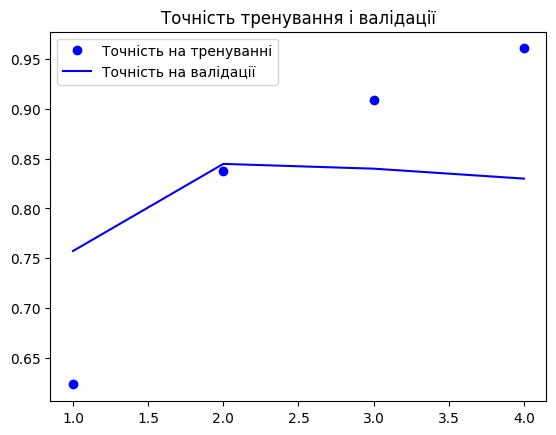

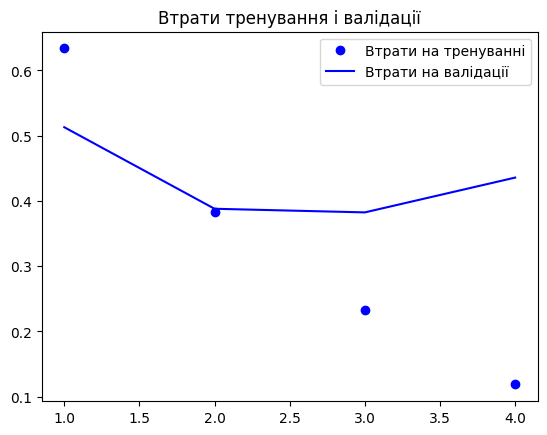

In [11]:
line_plot(history)

In [12]:
test_prediction(model)

782/782 [==============================] - 30s 38ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 32s 41ms/step - loss: 0.4501 - acc: 0.8221
Test Loss: 0.45010313391685486
Test Accuracy: 0.8220800161361694


#LSTM(32)

In [13]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=LSTM(32),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          640000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 648353 (2.47 MB)
Trainable params: 648353 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit()

Epoch 1/50
157/157 [==============================] - 29s 169ms/step - loss: 0.4987 - acc: 0.7578 - val_loss: 0.3172 - val_acc: 0.8712
Epoch 2/50
157/157 [==============================] - 19s 124ms/step - loss: 0.2362 - acc: 0.9100 - val_loss: 0.3063 - val_acc: 0.8850
Epoch 3/50
157/157 [==============================] - 18s 114ms/step - loss: 0.1534 - acc: 0.9483 - val_loss: 0.3330 - val_acc: 0.8832
Epoch 4/50
157/157 [==============================] - 16s 103ms/step - loss: 0.0969 - acc: 0.9692 - val_loss: 0.3373 - val_acc: 0.8828
Epoch 4: early stopping


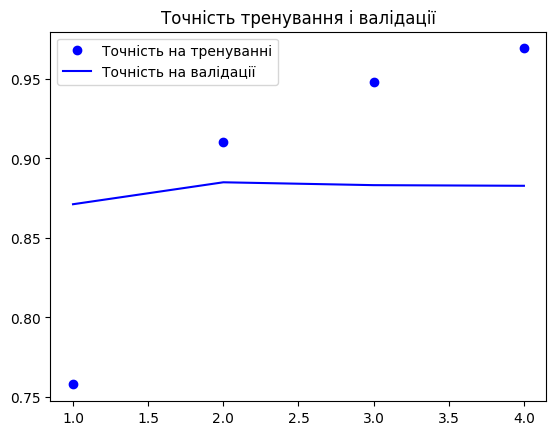

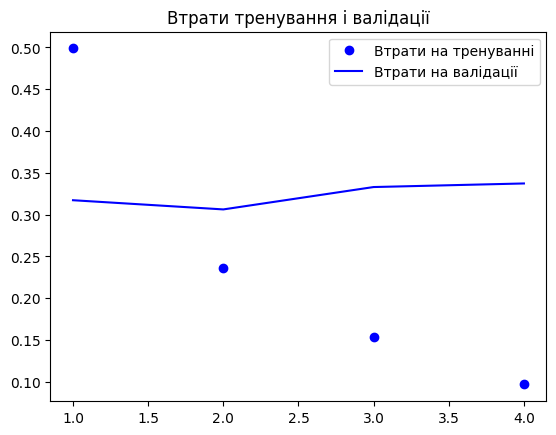

In [15]:
line_plot(history)

In [16]:
test_prediction(model)

782/782 [==============================] - 6s 8ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 7s 9ms/step - loss: 0.3817 - acc: 0.8648
Test Loss: 0.3817328214645386
Test Accuracy: 0.864799976348877


#Bidirectional(LSTM(32))

In [17]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=Bidirectional(LSTM(32)),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 656705 (2.51 MB)
Trainable params: 656705 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model.fit()

Epoch 1/50
157/157 [==============================] - 29s 160ms/step - loss: 0.4933 - acc: 0.7517 - val_loss: 0.3578 - val_acc: 0.8594
Epoch 2/50
157/157 [==============================] - 21s 132ms/step - loss: 0.2471 - acc: 0.9092 - val_loss: 0.2992 - val_acc: 0.8864
Epoch 3/50
157/157 [==============================] - 17s 109ms/step - loss: 0.1570 - acc: 0.9487 - val_loss: 0.2934 - val_acc: 0.8858
Epoch 4/50
157/157 [==============================] - 14s 90ms/step - loss: 0.1069 - acc: 0.9674 - val_loss: 0.3340 - val_acc: 0.8824
Epoch 4: early stopping


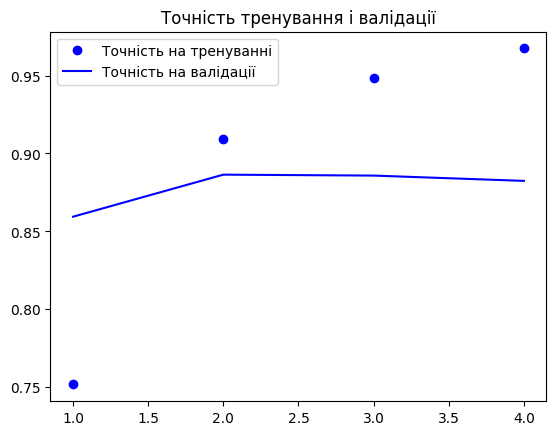

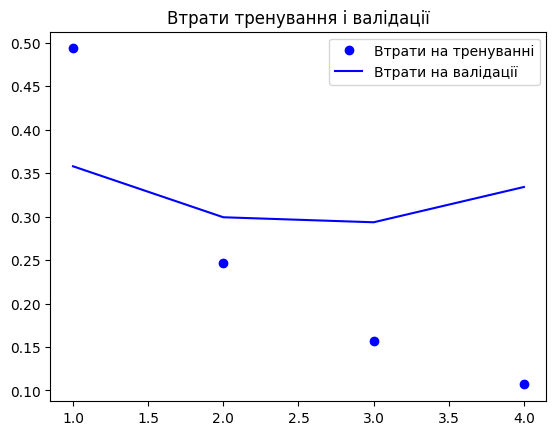

In [19]:
line_plot(history)

In [20]:
test_prediction(model)

782/782 [==============================] - 12s 14ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 12s 16ms/step - loss: 0.3711 - acc: 0.8667
Test Loss: 0.3710964322090149
Test Accuracy: 0.8666800260543823


#Bidirectional(GRU(32))

In [21]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=Bidirectional(GRU(32)),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

In [22]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12672     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 652737 (2.49 MB)
Trainable params: 652737 (2.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit()

Epoch 1/50
157/157 [==============================] - 29s 162ms/step - loss: 0.5341 - acc: 0.7110 - val_loss: 0.3406 - val_acc: 0.8622
Epoch 2/50
157/157 [==============================] - 20s 127ms/step - loss: 0.2714 - acc: 0.8921 - val_loss: 0.3218 - val_acc: 0.8720
Epoch 3/50
157/157 [==============================] - 17s 108ms/step - loss: 0.1772 - acc: 0.9360 - val_loss: 0.3540 - val_acc: 0.8728
Epoch 4/50
157/157 [==============================] - 16s 104ms/step - loss: 0.1226 - acc: 0.9586 - val_loss: 0.3808 - val_acc: 0.8706
Epoch 5/50
157/157 [==============================] - 13s 81ms/step - loss: 0.0886 - acc: 0.9715 - val_loss: 0.4313 - val_acc: 0.8574
Epoch 5: early stopping


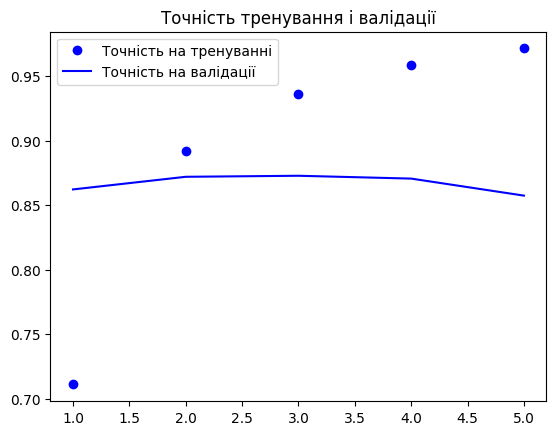

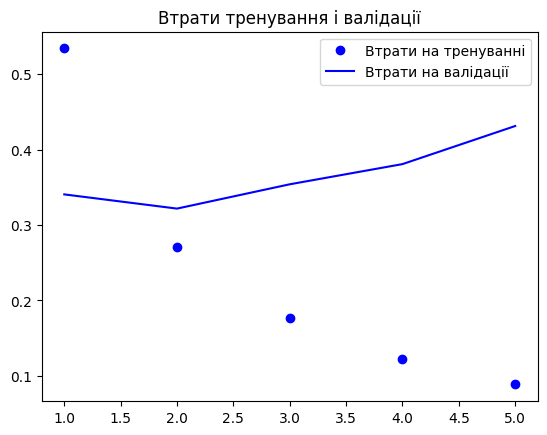

In [24]:
line_plot(history)

In [25]:
test_prediction(model)

782/782 [==============================] - 12s 14ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 12s 15ms/step - loss: 0.4803 - acc: 0.8438
Test Loss: 0.4802873134613037
Test Accuracy: 0.8438000082969666


#Глибока

In [26]:
class Model:
    def __init__(self, input_train, y_train, epochs, batch_size, validation_split):

        self.input_train = input_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split

        self.callback_early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1, mode="max")
        self.callback_save = ModelCheckpoint("best_Hw11.keras", monitor="val_loss", save_best_only=True)

        self.model = Sequential()
        self.model.add(Embedding(max_features, 32))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32)))
        self.model.add(Dense(1, activation='sigmoid'))

    Bidirectional(LSTM(32))

    def compile(self):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
        return self.model

    def summary(self):
        self.model.summary()
        return self.model

    def fit(self):
        fits = self.model.fit(self.input_train,
                              self.y_train,
                              epochs=self.epochs,
                              batch_size=self.batch_size,
                              validation_split=self.validation_split,
                              callbacks=[self.callback_early_stopping,  self.callback_save])
        return fits

    def predict(self):
        return model.predict(data_test)

In [27]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 64)          24832     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, None, 64)         

In [28]:
history = model.fit()

Epoch 1/50
157/157 [==============================] - 51s 240ms/step - loss: 0.4552 - acc: 0.7754 - val_loss: 0.2973 - val_acc: 0.8840
Epoch 2/50
157/157 [==============================] - 32s 203ms/step - loss: 0.1912 - acc: 0.9312 - val_loss: 0.3442 - val_acc: 0.8688
Epoch 3/50
157/157 [==============================] - 31s 196ms/step - loss: 0.1115 - acc: 0.9643 - val_loss: 0.3861 - val_acc: 0.8548
Epoch 3: early stopping


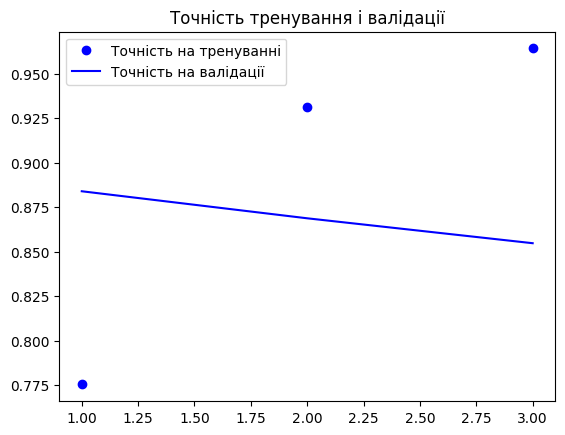

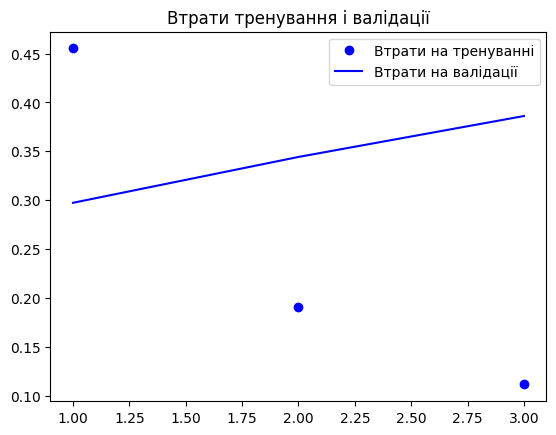

In [29]:
line_plot(history)

In [30]:
test_prediction(model)

782/782 [==============================] - 41s 49ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 40s 51ms/step - loss: 0.4203 - acc: 0.8399
Test Loss: 0.42031294107437134
Test Accuracy: 0.8399199843406677


#Висновок

З оптимізатором adam найкращу точність показали моделі з архітектурою LSTM(32) та Bidirectional(LSTM(32)).